In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import sklearn.preprocessing

In [17]:
crime_data = pd.read_csv('../new_data/zip_crime_data.csv')
restaurant_data = pd.read_csv('../new_data/restaurant_data.csv')

In [18]:
dataset = crime_data

In [4]:
# dataset = dataset.join(restaurant_data.set_index('zipcode'), on='zipcode')

In [5]:
ny_house_sell_data = pd.read_csv('../new_data/ny_house_sell.csv')
ny_house_sell_data['avg_house_sell_price'] = ny_house_sell_data.drop('zipcode', axis='columns').mean(axis=1)

In [6]:
ny_house_rent_data = pd.read_csv('../new_data/ny_house_rent.csv')
ny_house_rent_data['avg_house_rent_price'] = ny_house_rent_data.drop('zipcode', axis='columns').mean(axis=1)

In [7]:
dataset = dataset.join(ny_house_sell_data[['zipcode', 'avg_house_sell_price']].set_index('zipcode'), on='zipcode')
dataset = dataset.join(ny_house_rent_data[['zipcode', 'avg_house_rent_price']].set_index('zipcode'), on='zipcode')

In [8]:
# def fillna_with_avg(dataset, columns):
#     # handle missing data
#     dataset.fillna(method)
#     return dataset.fillna()
#    for col_name in dataset.columns:
##         dataset[col_name + '_mv'] = 0
##         dataset.loc[pd.isnull(dataset[col_name]), col_name + '_mv'] = 1
##         dataset[col_name].fillna(dataset[col_name].mean(), axis=1, inplace=True)
#         if (pd.isnull(dataset[col_name])).any():
#             avg_feature = dataset[col_name].mean()
#             dataset[col_name + '_mv'] = 0
#             dataset.loc[pd.isnull(dataset[col_name]), col_name + '_mv'] = 1
#             dataset[col_name].fillna(avg_feature, axis=1, inplace=True)
#     return dataset
dataset = dataset.fillna(method='ffill')

In [9]:
# must fill na first
# le = sklearn.preprocessing.LabelEncoder()
# dataset['type'] = le.fit_transform(dataset['type'])

In [19]:
def splitToTrainTest(dataframe, trainPercent):
    recordNum = dataframe.shape[0]
    shuffledIndex = np.random.permutation(np.arange(recordNum))
    trainSetNum = int(recordNum * trainPercent)
    trainDf, testDf = dataframe.iloc[shuffledIndex[:trainSetNum]], dataframe.iloc[shuffledIndex[trainSetNum:]]
    return trainDf, testDf
train_df, test_df = splitToTrainTest(dataset, 0.8)

In [20]:
# ['count', 'type', 'avg_house_rent_price', 'avg_house_sell_price', 'lat', 'lon']

clf = DecisionTreeClassifier(criterion='entropy')
relevant_labels = ['lat', 'lon']
y_labels = ['LEVEL_FELONY', 'LEVEL_MISDEMEANOR', 'LEVEL_VIOLATION']
clf.fit(train_df[relevant_labels], train_df[y_labels])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Text(0,0.5,'Normalized Gini Importance')

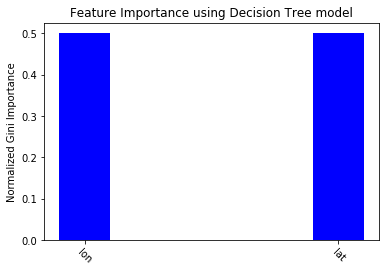

In [21]:
new_df = pd.DataFrame({'importance':clf.feature_importances_, 'feature':train_df[relevant_labels].columns.values})
new_df.sort_values('importance', axis = 0, inplace = True)
fig, ax = plt.subplots()
ax.bar(np.arange(len(new_df['importance'].values)), new_df['importance'].values, width = 0.2, color='b')
ax.set_xticks(np.arange(len(new_df['importance'].values)))
ax.set_xticklabels(new_df['feature'].values, rotation=-45)
plt.title('Feature Importance using Decision Tree model')
ax.set_ylabel('Normalized Gini Importance')

In [22]:
train_df[relevant_labels + y_labels].corr()

,lat,lon,LEVEL_FELONY,LEVEL_MISDEMEANOR,LEVEL_VIOLATION
lat,1.000000,0.313820,-0.016991,0.029948,-0.020158
lon,0.313820,1.000000,0.028640,-0.029325,0.004049
LEVEL_FELONY,-0.016991,0.028640,1.000000,-0.732737,-0.270577
LEVEL_MISDEMEANOR,0.029948,-0.029325,-0.732737,1.000000,-0.456866
LEVEL_VIOLATION,-0.020158,0.004049,-0.270577,-0.456866,1.000000


In [23]:
train_predict = clf.predict(train_df[relevant_labels])
test_predict = clf.predict(test_df[relevant_labels])
train_accuracy = metrics.accuracy_score(train_predict, train_df[y_labels])
test_accuracy = metrics.accuracy_score(test_predict, test_df[y_labels])

print('Train accuracy = {}\nTest accuracy = {}'.format(train_accuracy, test_accuracy))

Train accuracy = 0.5257644291659128
Test accuracy = 0.3947429365446966


In [25]:
print(train_df[relevant_labels].shape, train_df[relevant_labels].columns.values)
print(test_df[relevant_labels].shape, test_df[relevant_labels].columns.values)

(276350, 2) ['lat' 'lon']
(69088, 2) ['lat' 'lon']


In [38]:
lib_data = pd.read_csv('../data/NYC_Lib_zip_count.csv')
mus_data = pd.read_csv('../data/NYC_Mus_zip_count.csv')
store_data = pd.read_csv('../data/NYC_Store_Count.csv')
store_clean_data = pd.read_csv('../data/NYC_Store_clean.csv')
univ_data = pd.read_csv('../data/NYC_Univ_zip_count.csv')
popu_data = pd.read_csv('../data/popu_zip.csv')
zip_clean_data = pd.read_csv('../data/zip_code_database_clean.csv')
hospital_data = pd.read_csv('../data/NYC_hospital_zip_count.csv')
school_data = pd.read_csv('../data/NYC_school_zip_count.csv')
park_data = pd.read_csv('../data/NYU_parkArea_zip.csv')
park_data 

,Address ZIP,count
0,10001,147.060734
1,10002,1582.456530
2,10003,261.615002
3,10004,0.000000
4,10005,530.743126
5,10006,0.000000
6,10007,0.000000
7,10008,0.000000
8,10009,1514.432163
9,10010,235.601640
